$$\newcommand{\worth}{v}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\cdf}{\text{cdf}}
$$

# Relative Improvement Decision Making
   
### 2018-06-07

### Neil D. Lawrence

The idea of relative improvement is that our personal utility is related to our relative change in society. For example, our sensitivity to an increase in salary is dependent on how it situates us relative to our peers, rather than an absolute change in position.
   
How a change in circumstance effects us, is therefore related to our context, and how resources or income are distributed throughout our community.

Firstly, we'll consider a worked example. 

### Marginal Utility

As a starting example, consider the *logarithmic utility* as suggested by Daniel Bernoulli. If we are sensitive to the log of change, we can inverse engineer what our *assumption* about the underlying distribution of resources or income is.

Expected gain under logarithmic utility is 
$$
\log \worth_2 - \log \worth_1
$$
If we are interested in our relative position in the population, this implies our change in relative position is given by
$$
\cdf(\worth_2) - \cdf(\worth_1)
$$
which implies that we are assuming that the logarithm is the cumulative distribution function (CDF) of the underlying wealth distribution. To recover the probability density function (PDF) we differentiate the CDF and recover,
$$
p(\worth) = \frac{1}{\worth}
$$
which is not a correctly normalized distribution, but is often used as an improper density covering the positive half space, i.e. if we don't have knowledge of the underlying density then defining the Gamma density as,
$$
\gammaDist{\worth}{a}{b} = \frac{b^a \worth^{a-1}e^{-b\worth}}{\Gamma(a)}
$$
we can take the limit as $a\rightarrow 0$ and $b\rightarrow 0$ and recover the improper prior over $\worth$ of $\frac{1}{\worth}$ as suggested by Daniel Bernoulli's logarithmic utility.

Given our starting example, which reverse engineered an existing marginal utility, we can now start from a more usual assumption of the distribution of resource or income, the Pareto distribution, and engineer directly a utility based on the idea of *relative improvement*. 

The Pareto distribution is a density proposed to model the wealth or income in a population. 
$$
p(\worth) = \frac{\alpha \worth_m^\alpha}{\worth^{\alpha+1}}
$$
The CDF for the Pareto density is given by
$$
\cdf(\worth) = 1 - \left(\frac{\worth_m}{\worth}\right)^\alpha
$$
So the marginal utility is given by
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha-\left(\frac{\worth_m}{\worth_2}\right)^\alpha
$$




$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha-\left(\frac{\worth_m}{\worth_2}\right)^\alpha
$$
$$
m(\worth_1, \worth_2) = \worth_m^\alpha\frac{\worth_2^\alpha - \worth_1^\alpha}{\left(\worth_1\worth_2\right)^\alpha}
$$
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha\frac{\worth_2^\alpha - \worth_1^\alpha}{\worth_2^\alpha}
$$
$$
m(\worth_1, \worth_2) = \left(\frac{\worth_m}{\worth_1}\right)^\alpha\frac{(\worth_1 + \delta\worth)^\alpha - \worth_1^\alpha}{(\worth_1+\delta\worth)^\alpha}
$$

For the most exterme case $\alpha=1$ we have
$$
m(\worth_1, \worth_2) = \worth_m\frac{\worth_2 - \worth_1}{\worth_1\worth_2}
$$
considering $\delta \worth$
$$
m(\delta\worth) = \frac{\worth_m}{\worth_1}\frac{\delta \worth}{(\delta\worth + \worth_1)}
$$

In [6]:
from scipy.special import gammainc, gamma

In [ ]:
class Utility():
    def __init__(self):
        pass
    
    def u(self):
        raise NotImplementedError
        
    def uprime(self):
        raise NotImplementedError
        
    def A(self):
        raise NotImplementedError
        
    def R(self, c):
        return self.ara*c

    def _repr_html_(self)
        raise NotImplementedError
        
class Exponential(Utility):
    def __init__(self, a=1.):
        Utility.__init__(self)
        self.a = 1.
        
    def u(self, c):
        return 1-np.exp(-self.a*c)
    
    def uprime(self, c):
        return self.a*np.exp(-self.a*c)
    
    def A(self, c):
        return self.a*np.ones(c.shape)
    
class Log(Utility):
    def __init__(self):
        """Log utility function. This utility funciton doesn't have an associated underlying PDF, but 1/c is often used as an uninformative prior across a space"""
        Utility.__init__(self)
        
    def u(self, c):
        return np.log(c)
    
    def uprime(self, c):
        return 1./c
    
    def A(self, c):
        return 1./c
    
    def R(self, c):
        return np.ones(c.shape)
    
class Isoelastic(Utility):
    def __init__(self, eta):
        Utility.__init__(self)
        self.eta=eta
        
    def u(self, c):
        if self.eta==1:
            return np.log(c)
        else:
            return (c**(1-self.eta) - 1)/(1-self.eta)
        
    def uprime(self, c):
        if self.eta==1:
            return c**(1-2*self.eta)
        
    def A(self, c):
        return (2.*self.eta - 1.)/c
    
    def R(self, c):
        return (2.*self.eta - 1)
    
    
class LogLogistic(Utility):
    def __init(self, alpha=1., beta=1.):
        Utility.__init__(self)
        self.alpha = alpha
        self.beta = beta
        
    def u(self, c):
        return 1/(1+(c/self.alpha)**-self.beta)
    
    def uprime(self, c):
        return ((self.beta/self.alpha)*(c/self.alpha)**(self.beta-1))/(1+(c/self.alpha)**self.beta)**2
    
    def A(self, c):
        return (self.beta-1.)/c - 2/(self.alpha + c)
    
    def R(self, c):
        return self.beta -1. - 2/(self.alpha/c + 1.)


In [42]:
c = np.random.randn(10, 1)
np.ones(c.shape)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/neil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


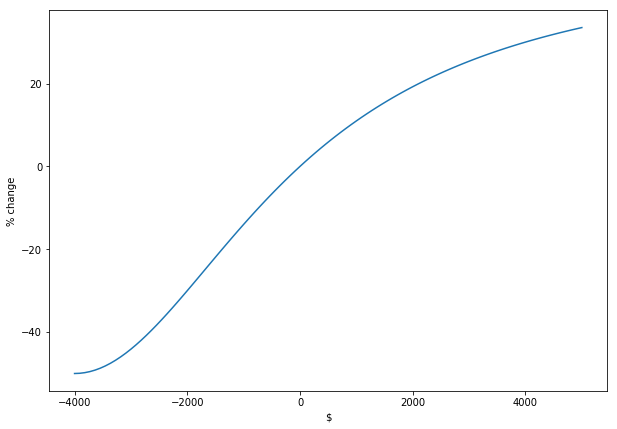

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10, 7))
vm = 1
v1 = 4000
alpha = 20
a=9
b=0.0003
dv = np.linspace(-4000, 5000, 100)

# From CDF of Pareto density
m = np.exp(alpha*np.log(vm/v1) - alpha*np.log(dv+v1))*((v1+dv)**alpha-v1**alpha)

# From CDF of 1/x
m2 = np.log(v1+dv)-np.log(v1)

# From CDF of Gamma density
m3 = (gammainc(a, b*(v1+dv))-gammainc(a, b*v1))/gamma(a)

# Log Logistic (Dagum idstribution)
alpha = 4000
beta = 2
p = 1
m4 = (1+(alpha/(v1+dv))**beta)**-p - (1+(alpha/v1)**beta)**-p

plt.ylabel('% change')
plt.xlabel('$')
#ax.plot(dv, m*100)
_ = ax.plot(dv, m4*100)

### Connections with Prospect Theory

From reading [Prospect Theory](https://www.jstor.org/stable/1914185) [@Kahneman:prospect79], the main contribution seems to be the non-concavity of the value function (utility function). This arises in Relative Improvement when the probability density has a non zero mode. 

The study adds further experimental evidence that people who "have" make more risk-averse decisions, while the "have-nots" make more risk-seeking decisions. This phenomenon has frequently been observed from studies using hypothetical decision-making situations [@Thaler:gambling90] and agrees with the increased risk aversion principle of Prospect Theory. This theory predicts exactly what we found, that is, prior losses put the subject in the domain of losses and prior gains have the opposite effect. http://journal.sjdm.org/06137/jdm06137.htm

https://core.ac.uk/download/pdf/7048428.pdf

[@Ramsey:truth26]

The Use of Distribution Functions to Represent Utility Functions
https://www.jstor.org/stable/2629422?seq=1#page_scan_tab_contents [@Berhold:distribution73]

Concavity of utility leads to decreasing marginal returns. 

von-Neumann-Morgenstern utility functions (VNM-utility functions) 

[@vonNeumann:games44]